In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

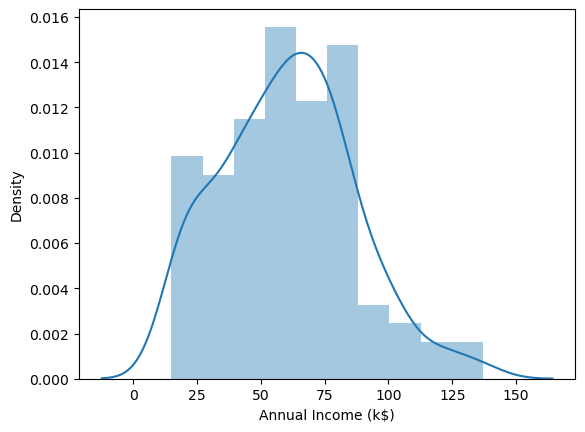

In [5]:
sns.distplot(df['Annual Income (k$)'])

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

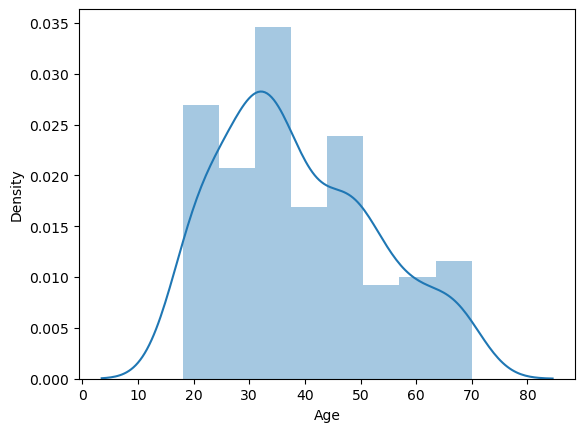

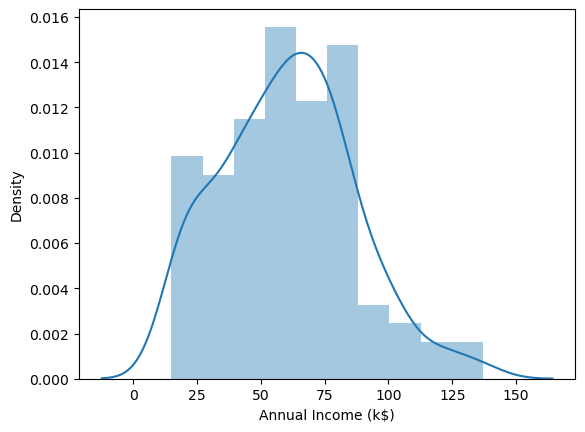

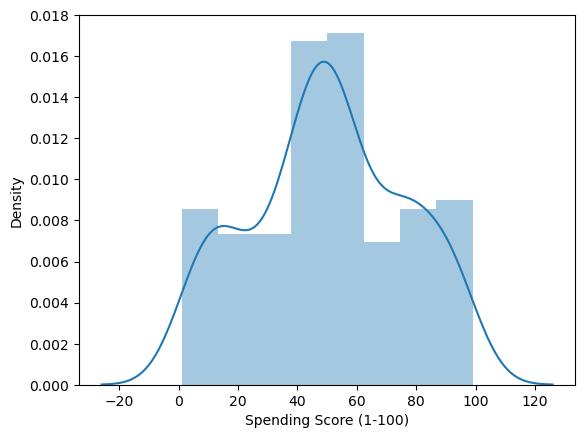

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

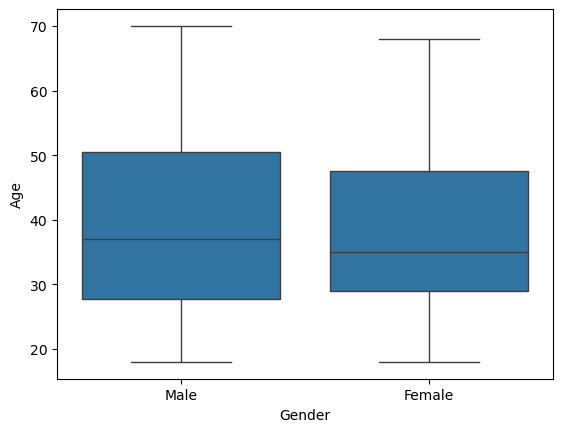

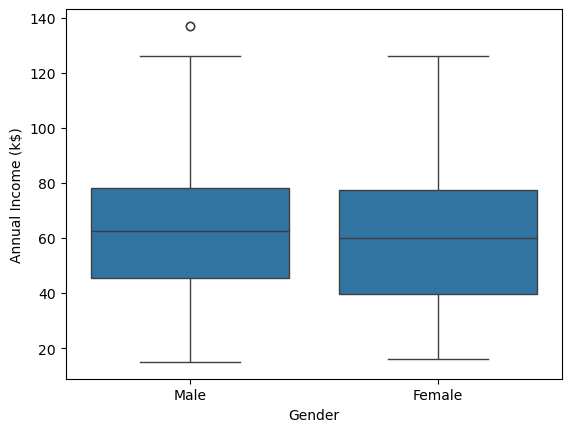

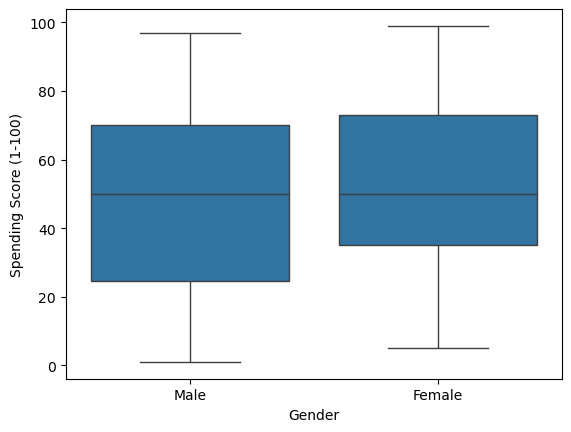

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender',y=df[i]);

In [9]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

bivariate analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

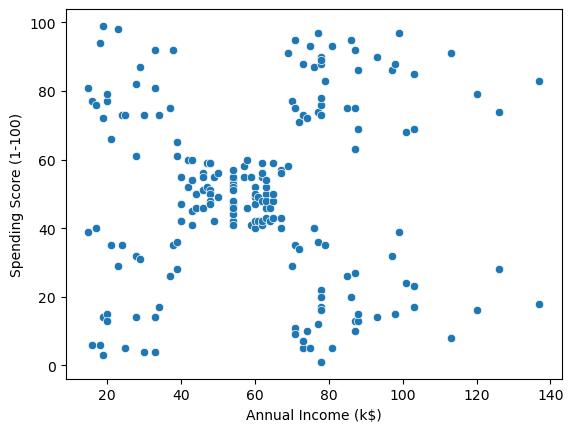

In [10]:
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)')

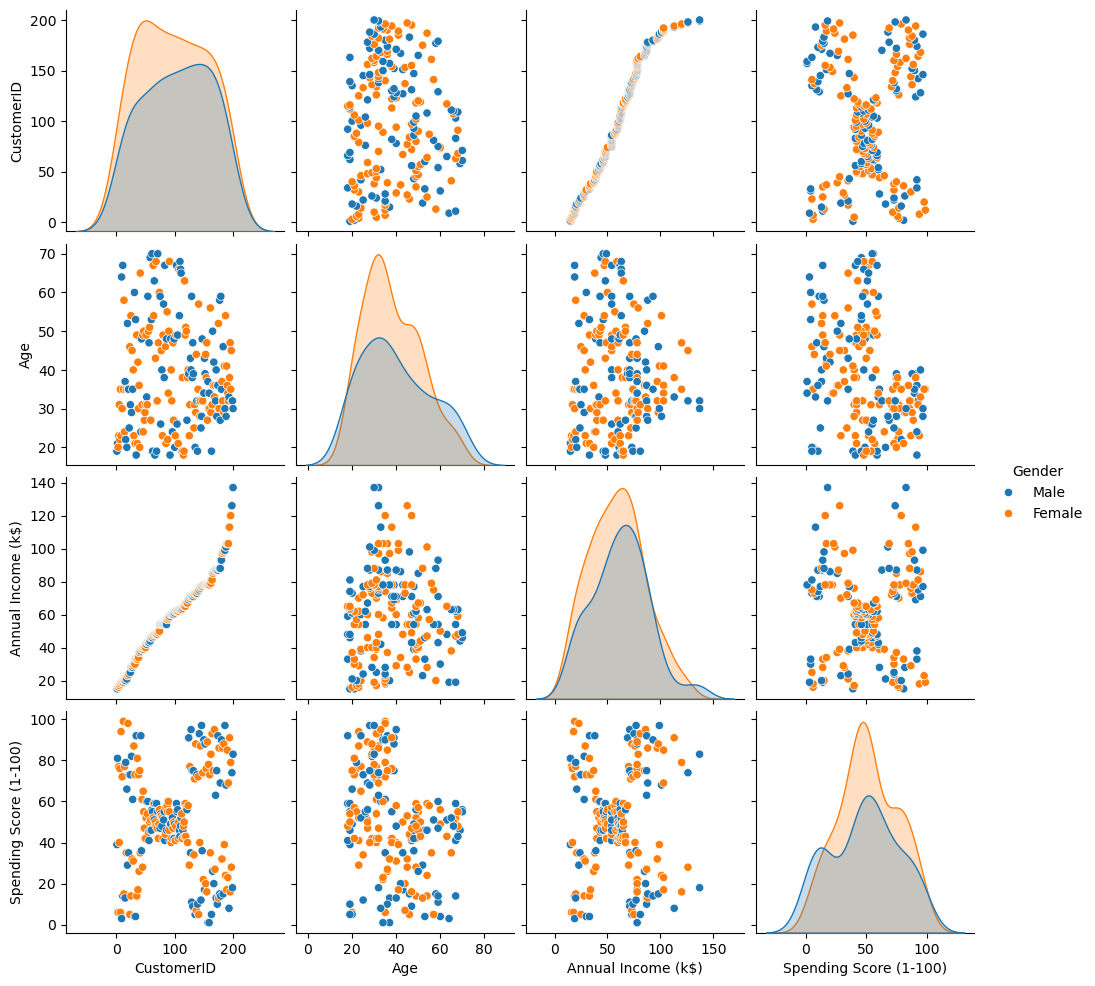

In [11]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [12]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
df.select_dtypes(include='number').corr()
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})  # Assuming 'Male' = 1 and 'Female' = 0
df.corr()
df = pd.get_dummies(df, drop_first=True)  # Converts categorical columns to dummy variables
df.corr()




,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

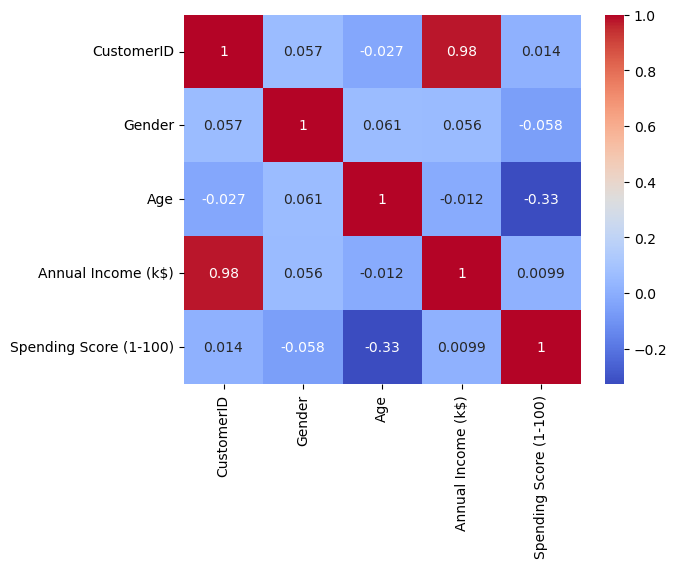

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

clutering- univariate, bivariate,multivarirate

In [19]:
clustering1= KMeans(n_clusters=6)

In [20]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [21]:
clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0])

In [22]:
df['Income Cluster']= clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,3
3,4,0,23,16,77,3
4,5,0,31,17,40,3


In [23]:
df['Income Cluster'].value_counts()

Income Cluster
4    46
1    44
5    42
3    32
2    28
0     8
Name: count, dtype: int64

In [26]:
from sklearn.cluster import KMeans

# Example data
X = [[1, 2], [1, 3], [2, 3], [8, 8], [8, 9], [9, 9]]

# Fit KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Get inertia
print(kmeans.inertia_)


2.666666666666667


In [25]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [27]:
intertia_scores

[137277.28000000006,
 49761.73701298703,
 25341.285871863212,
 13278.112713472483,
 9407.908188585603,
 5742.224880382777,
 3941.4163614163635,
 2985.5603641456573,
 2459.3303030303055,
 2013.4640637140633]

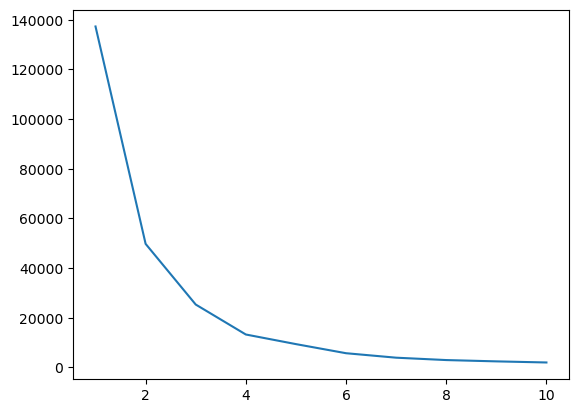

In [28]:
plt.plot(range(1,11),intertia_scores)

In [29]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [33]:
from sklearn.cluster import KMeans

# Assuming you are clustering based on 'Annual Income (k$)' and 'Spending Score (1-100)'
kmeans = KMeans(n_clusters=3)  # Example: 3 clusters
df['income cluster'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [34]:
df.groupby('income cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,40.325203,44.154472,49.829268
1,40.394737,87.000000,18.631579
2,32.692308,86.538462,82.128205


bivariate clustering

In [35]:
clustering2= KMeans()
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

df['Spending and income cluster']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,income cluster,Spending and income cluster
0,1,1,19,15,39,3,0,3
1,2,1,21,15,81,3,0,4
2,3,0,20,16,6,3,0,6
3,4,0,23,16,77,3,0,4
4,5,0,31,17,40,3,0,3


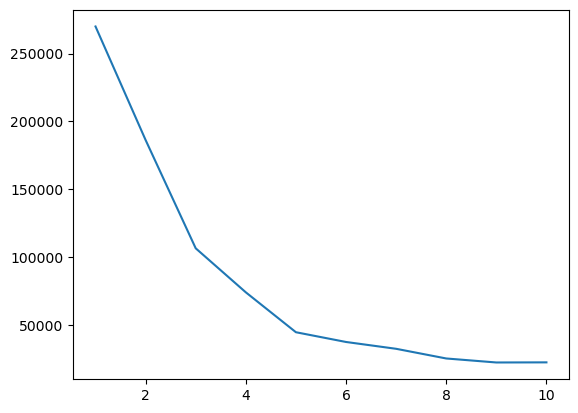

In [36]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), intertia_scores2)

In [37]:
centers= pd.DataFrame(clustering2.cluster_centers_)
centers.columns= ['x','y']

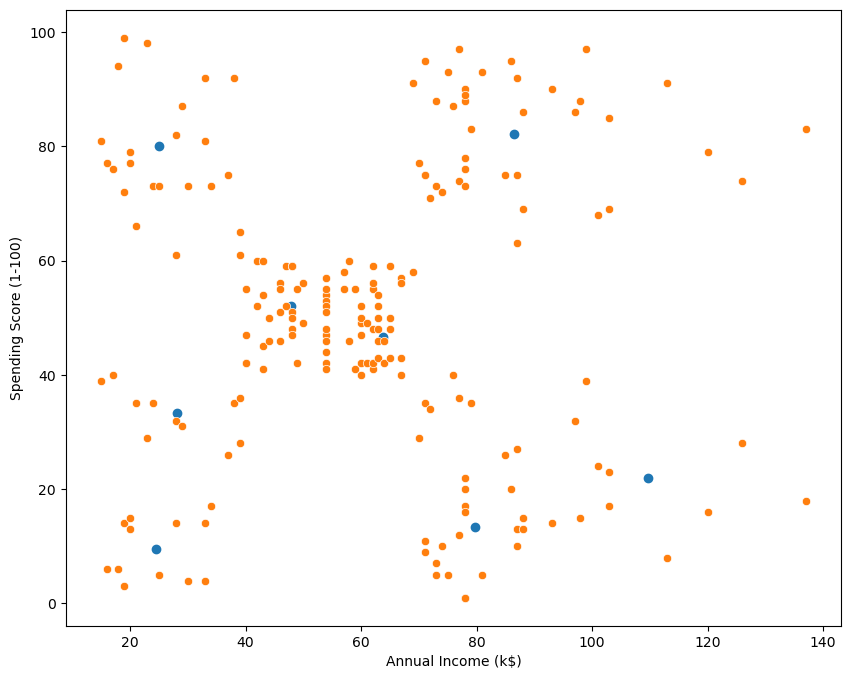

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'])
sns.scatterplot(data = df, x='Annual Income (k$)', y='Spending Score (1-100)',palette='table')
plt.savefig("clustering_bivariate.png")

In [39]:
pd.crosstab(df['Spending and income cluster'],df['Gender'],normalize='index')

Gender,0,1
Spending and income cluster,,
0,0.585366,0.414634
1,0.538462,0.461538
2,0.700000,0.300000
3,0.636364,0.363636
4,0.571429,0.428571
5,0.347826,0.652174
6,0.583333,0.416667
7,0.604651,0.395349


In [40]:
df.groupby('Spending and income cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and income cluster,,,
0,42.024390,63.804878,46.634146
1,32.692308,86.538462,82.128205
2,41.000000,109.700000,22.000000
3,41.363636,28.181818,33.272727
4,25.333333,25.095238,80.047619
5,40.217391,79.739130,13.391304
6,48.750000,24.583333,9.583333
7,43.372093,47.860465,51.976744


#multivariate clustering

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scale= StandardScaler()

In [43]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,income cluster,Spending and income cluster
0,1,1,19,15,39,3,0,3
1,2,1,21,15,81,3,0,4
2,3,0,20,16,6,3,0,6
3,4,0,23,16,77,3,0,4
4,5,0,31,17,40,3,0,3


In [44]:
dff= pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,income cluster,Spending and income cluster
0,1,1,19,15,39,3,0,3
1,2,1,21,15,81,3,0,4
2,3,0,20,16,6,3,0,6
3,4,0,23,16,77,3,0,4
4,5,0,31,17,40,3,0,3


In [45]:
dff.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster', 'income cluster',
       'Spending and income cluster'],
      dtype='object')

In [49]:
print(dff.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster', 'income cluster',
       'Spending and income cluster'],
      dtype='object')


In [50]:
dff['Gender_Male'] = (dff['Gender'] == 'Male').astype(int)


In [51]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [52]:
dff=scale.fit_transform(dff)

In [53]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,0.0
1,-1.281035,-1.738999,1.195704,0.0
2,-1.352802,-1.700830,-1.715913,0.0
3,-1.137502,-1.700830,1.040418,0.0
4,-0.563369,-1.662660,-0.395980,0.0


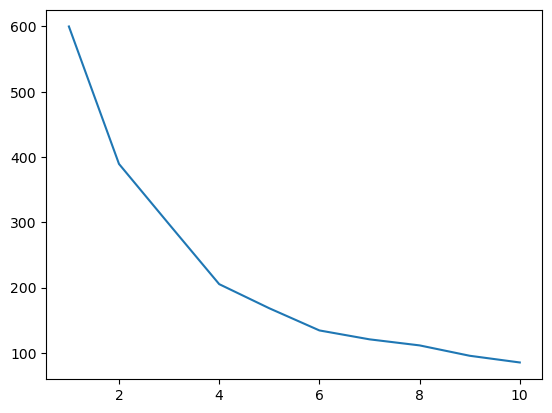

In [54]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), intertia_scores3)

In [55]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,income cluster,Spending and income cluster
0,1,1,19,15,39,3,0,3
1,2,1,21,15,81,3,0,4
2,3,0,20,16,6,3,0,6
3,4,0,23,16,77,3,0,4
4,5,0,31,17,40,3,0,3
...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,0,2,1
196,197,0,45,126,28,0,1,2
197,198,1,32,126,74,0,2,1
198,199,1,32,137,18,0,1,2


In [56]:
df.to_csv("Clustering.csv")